In [2]:
import cv2
import numpy as np
from utils import show_images

src = cv2.imread('image/edge/sources/06.png')

In [ ]:
# 还有另外一个类 RFFeatureGetter，但这个是训练时才用到，具体参考：
# https://github.com/fengzhenHIT/OpenCV-contrib-module-Chinese-Tutorials/blob/master/chapter%2020/%E8%AE%AD%E7%BB%83%E7%BB%93%E6%9E%84%E5%8C%96%E6%A3%AE%E6%9E%97.md
model_pth = './image/edge/StructuredEdgeDetection.yml'
pDollar = cv2.ximgproc.createStructuredEdgeDetection(model_pth)

# 检测边缘的图片要求：RGB、0-1
nowimg = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
edges = pDollar.detectEdges(np.float32(nowimg) / 255.0)
orimap = pDollar.computeOrientation(edges)
# The function edgenms in edge image and suppress edges where edge is stronger in orthogonal direction.
edges_nm = pDollar.edgesNms(edges, orimap)

show_images([
    ('src', src),
    ('edges', edges),
    ('edges nms', edges_nm)
])

In [ ]:
''' 
EdgeDrawing
'''
rgb_src = cv2.imread('image/edge/sources/06.png')
gray_src = cv2.cvtColor(rgb_src, cv2.COLOR_BGR2GRAY)

ed = cv2.ximgproc.createEdgeDrawing()

edParms = ed.Params()
edParms.GradientThresholdValue = 38
edParms.EdgeDetectionOperator = cv2.ximgproc.EdgeDrawing_SOBEL
edParms.AnchorThresholdValue = 8
ed.setParams(edParms)
# 最开始要执行这个函数，相当于和原图绑定一下
ed.detectEdges(gray_src)

edges_by_ed = np.copy(rgb_src)
segments = ed.getSegments()
for oneseg in segments:
    cv2.polylines(edges_by_ed, [oneseg], False, (0, 255, 0), 1)

# EdgeDrawing 还可以检测直线和椭圆
ellipses = ed.detectEllipses()
lines = ed.detectLines()


show_images([
    ('rgb src', rgb_src),
    ('edges by ed', edges_by_ed),
], colnum=5)

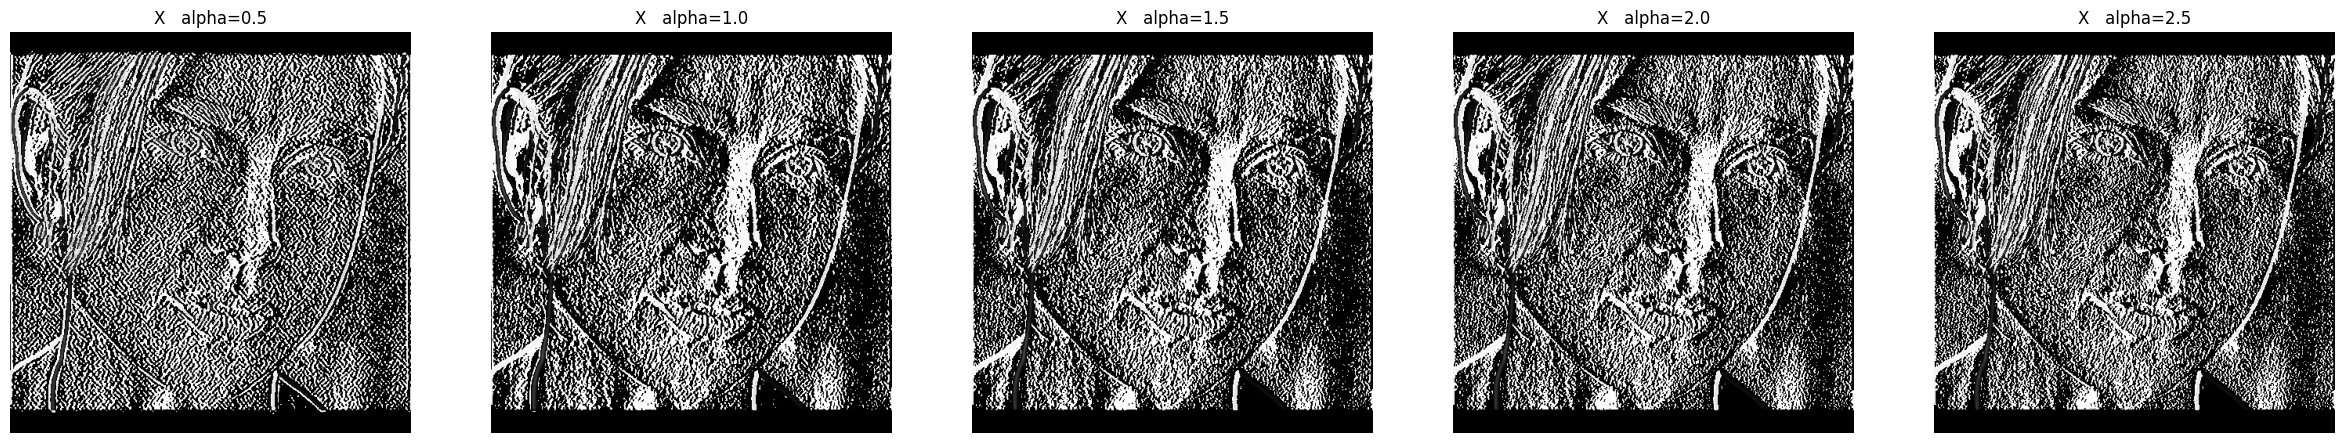

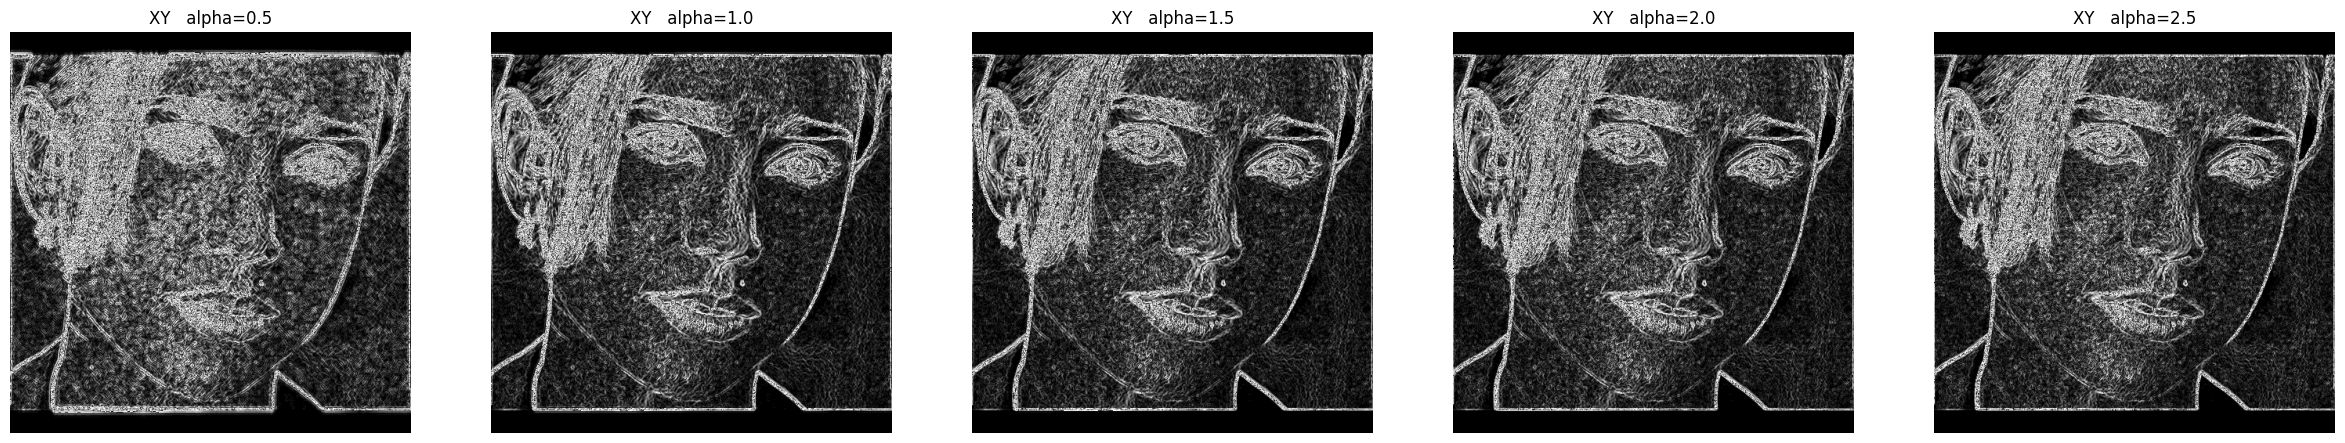

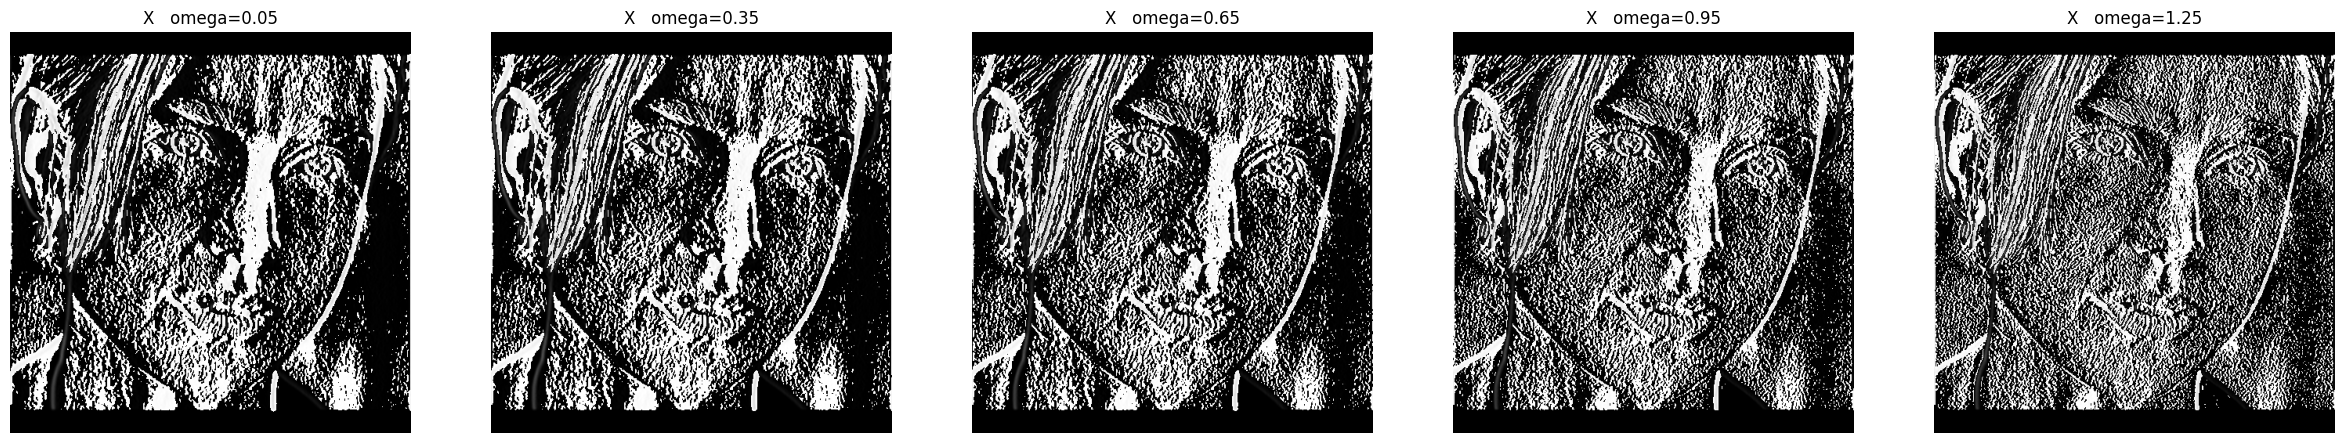

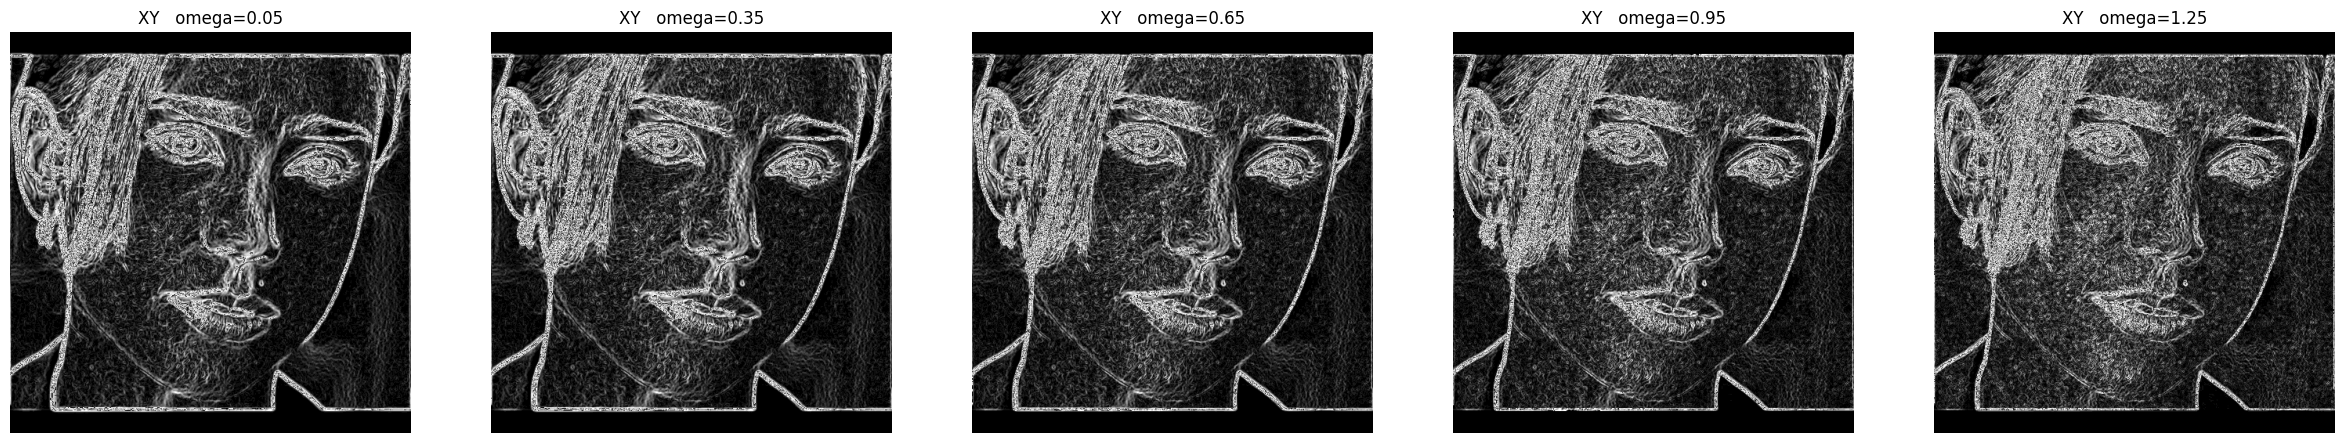

In [28]:
''' 
ximgproc 中的 Deriche, Paillou
'''
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

resultX, resultY, result = [], [], []
for i in range(5, 26, 5):
    edgesX = cv2.ximgproc.GradientDericheX(gray, alpha=i/10, omega=1)
    edgesX = edgesX.astype(np.uint8)
    resultX.append((f'X   alpha={i/10}', edgesX))

    edgesY = cv2.ximgproc.GradientDericheY(gray, alpha=i/10, omega=1)
    edgesY = edgesY.astype(np.uint8)
    resultY.append((f'Y   alpha={i/10}', edgesY))

    edges = np.sqrt(edgesX*edgesX + edgesY*edgesY).astype(np.uint8)
    result.append((f'XY   alpha={i/10}', edges))
show_images(resultX, colnum=len(resultX))
show_images(result, colnum=len(result))

resultX, resultY, result = [], [], []
for i in range(5, 150, 30):
    edgesX = cv2.ximgproc.GradientDericheX(gray, alpha=1.5, omega=i/100)
    edgesX = edgesX.astype(np.uint8)
    resultX.append((f'X   omega={i/100}', edgesX))

    edgesY = cv2.ximgproc.GradientDericheY(gray, alpha=1.5, omega=i/100)
    edgesY = edgesY.astype(np.uint8)
    resultY.append((f'Y   omega={i/100}', edgesY))

    edges = np.sqrt(edgesX*edgesX + edgesY*edgesY).astype(np.uint8)
    result.append((f'XY   omega={i/100}', edges))
show_images(resultX, colnum=len(resultX))
show_images(result, colnum=len(result))
 
# # 只能 CPP
# # void 	cv::ximgproc::GradientPaillouX (InputArray op, OutputArray _dst, double alpha, double omega)
# # void 	cv::ximgproc::GradientPaillouY (InputArray op, OutputArray _dst, double alpha, double omega)

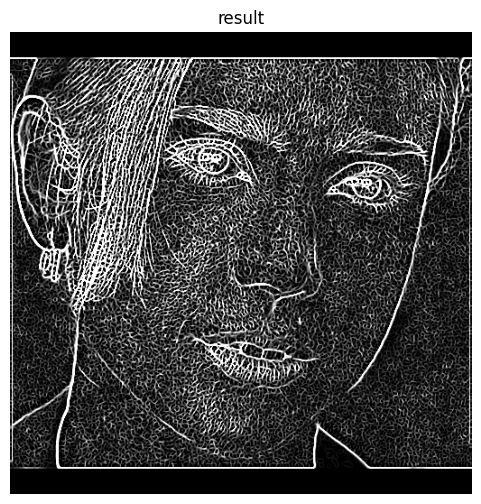

In [2]:
# Ridge

now_filter = cv2.ximgproc.RidgeDetectionFilter.create()
result = now_filter.getRidgeFilteredImage(src)

show_images([
    ('result', result),
])